# 2018_02_22-1neg2pos

electrode 1 negative  
electrode 2 positive

In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from loadLvm import *
from loadRadEye import *
%matplotlib inline

In [2]:
with open('data_dir.txt', 'r') as rfp:
    data_dir = rfp.read()
    
data_dir

'../../../Data/Lens Test Measurements'

In [3]:
fName = '2018_02_22-1neg2pos'
fName1 = '2018_02_22-1neg2pos2'
fNamelvm = '{1}/{0}.lvm'.format(fName, data_dir)
fNamelvm2 = '{1}/{0}.lvm'.format(fName1, data_dir)
fNameRadEye = '{1}/{0}.log'.format(fName, data_dir)
dataLVM = loadlvm_electrostaticlenstests(fNamelvm)
dataLVM2 = loadlvm_electrostaticlenstests(fNamelvm2)
dataLVM = dataLVM.append(dataLVM2)
dataRADEYE = load_radeyeg20(fNameRadEye)

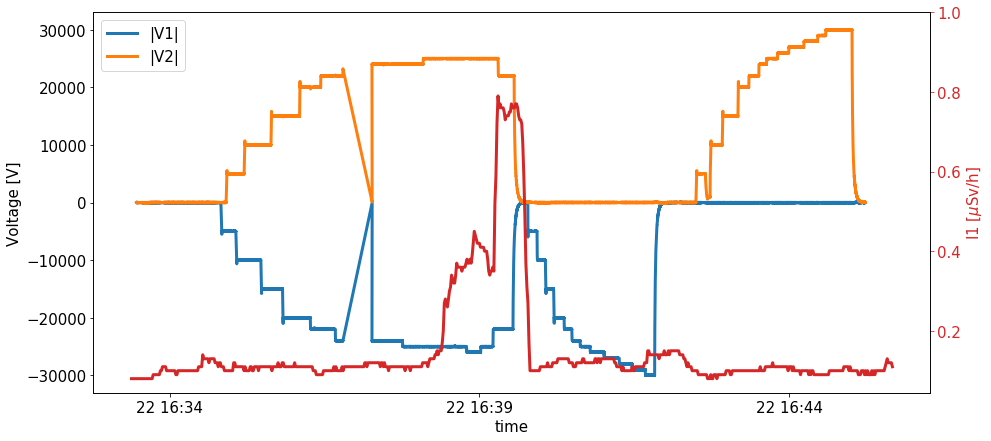

In [4]:
fs = 15

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(dataLVM.time, dataLVM.V1, lw = 3, label = '|V1|');
ax.plot(dataLVM.time, dataLVM.V2, lw = 3, label = '|V2|');
ax.legend(fontsize = fs)
ax.set_xlabel('time', fontsize = fs)
ax.set_ylabel('Voltage [V]', fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs);
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
ax1 = ax.twinx()
ax1.plot(dataRADEYE.time, dataRADEYE['Dose Rate'], 'C3', lw = 3);
ax1.set_ylabel(r'I1 [$\mu$Sv/h]', fontsize = fs, color = 'C3')
ax1.set_ylim(ymax = 1.0)
ax1.tick_params('y', colors='C3');
ax1.tick_params(axis='both', which='major', labelsize=fs);
fig.savefig('{0}_voltagedose.png'.format(fName))

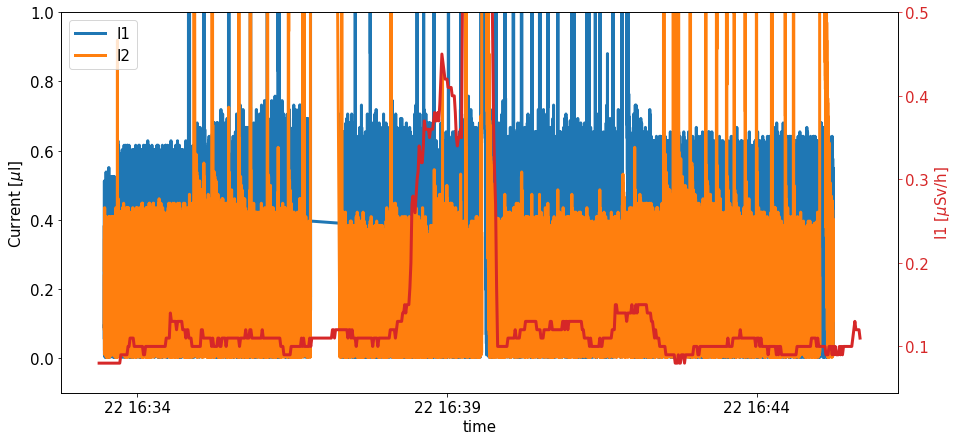

In [5]:
fs = 15

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(dataLVM.time, dataLVM.I1.abs(), lw = 3, label = 'I1');
ax.plot(dataLVM.time, dataLVM.I2.abs(), lw = 3, label = 'I2');
ax.legend(fontsize = fs)
ax.set_xlabel('time', fontsize = fs)
ax.set_ylim(ymin = -.1, ymax = 1)
ax.set_ylabel(r'Current [$\mu$I]', fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs);
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
ax1 = ax.twinx()
ax1.plot(dataRADEYE.time, dataRADEYE['Dose Rate'], 'C3', lw = 3);
ax1.set_ylabel(r'I1 [$\mu$Sv/h]', fontsize = fs, color = 'C3')
ax1.set_ylim(ymax = 0.5)
ax1.tick_params('y', colors='C3');
ax1.tick_params(axis='both', which='major', labelsize=fs);

In [6]:
maskRADEYE = dataRADEYE['Dose Rate'] > 0.3

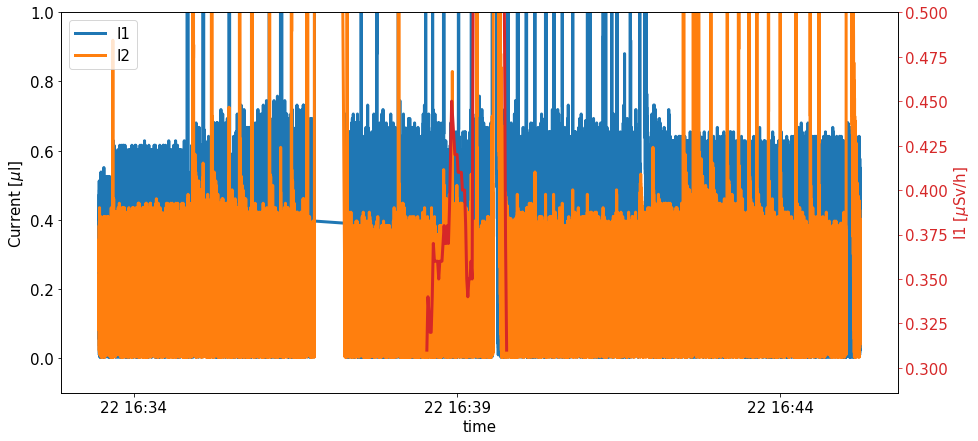

In [7]:
fs = 15

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(dataLVM.time, dataLVM.I1.abs(), lw = 3, label = 'I1');
ax.plot(dataLVM.time, dataLVM.I2.abs(), lw = 3, label = 'I2');
ax.legend(fontsize = fs)
ax.set_xlabel('time', fontsize = fs)
ax.set_ylim(ymin = -.1, ymax = 1)
ax.set_ylabel(r'Current [$\mu$I]', fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs);
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
ax1 = ax.twinx()
ax1.plot(dataRADEYE.time[maskRADEYE], dataRADEYE['Dose Rate'][maskRADEYE], 'C3', lw = 3);
ax1.set_ylabel(r'I1 [$\mu$Sv/h]', fontsize = fs, color = 'C3')
ax1.set_ylim(ymax = 0.5)
ax1.tick_params('y', colors='C3');
ax1.tick_params(axis='both', which='major', labelsize=fs);